In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
from io import StringIO
from classes import BalancedUndersamplingShuffle, balanced_sampling
from helpers import plot_learning_curve, plot_validation_curve, fit_and_score_pipeline, exp_range, \
    validation_curve_with_undersampling, plot_validation_curve_with_undersampling, fit_and_score_iteratively, plot_curves
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, KFold
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import GradientBoostingClassifier


In [2]:
with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)[:5000]
    X_test = np.load(f2)
    y_train = np.load(f3)[:5000]
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)[:5000]
    y_test_ohe = np.load(f6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_ohe.shape, y_test_ohe.shape)


(5000, 784) (10000, 784) (5000, 1) (10000, 1) (5000, 10) (10000, 10)


In [6]:
# No undersampling
classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)

print(train_res, test_res)


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9994 0.9123


In [7]:
# No undersampling
classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe,
                                                X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True)

print(train_res, test_res)


ValueError: y should be a 1d array, got an array of shape (5000, 10) instead.

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

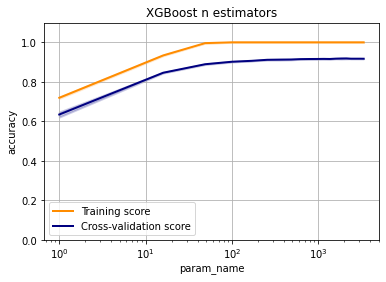

In [9]:
# optimize number of weak classifiers

param_range = list(exp_range(1, 60, 3, 2))


cv = KFold(n_splits=2, shuffle=True, random_state=0)

classifier = GradientBoostingClassifier(random_state=0)

train_scores, test_scores, labeled_train, labeled_test= plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_estimators', param_range=param_range,
                      cv=cv, scoring='accuracy', n_jobs=8, title='XGBoost n estimators')


In [10]:
labeled_test

array([[1.000e+00, 6.348e-01],
       [1.600e+01, 8.462e-01],
       [4.900e+01, 8.892e-01],
       [1.000e+02, 9.018e-01],
       [1.690e+02, 9.064e-01],
       [2.560e+02, 9.116e-01],
       [3.610e+02, 9.124e-01],
       [4.840e+02, 9.130e-01],
       [6.250e+02, 9.150e-01],
       [7.840e+02, 9.156e-01],
       [9.610e+02, 9.158e-01],
       [1.156e+03, 9.162e-01],
       [1.369e+03, 9.158e-01],
       [1.600e+03, 9.174e-01],
       [1.849e+03, 9.180e-01],
       [2.116e+03, 9.184e-01],
       [2.401e+03, 9.172e-01],
       [2.704e+03, 9.172e-01],
       [3.025e+03, 9.172e-01],
       [3.364e+03, 9.170e-01]])

In [ ]:
# optimize number of weak classifiers

param_range = list(exp_range(1, 60, 3, 2))


cv = KFold(n_splits=2, shuffle=True, random_state=0)

classifier = GradientBoostingClassifier(random_state=0, max_depth=3)

train_scores, test_scores, labeled_train, labeled_test= plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_estimators', param_range=param_range,
                      cv=cv, scoring='accuracy', n_jobs=8, title='XGBoost n estimators')


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected